# Projet numérique : Equations différentielles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import optimize

### Définition du modèle

In [2]:
#paramètres
alpha = 2/3
beta = 4/3
gamma = 1
delta = 1

In [3]:
def f(x):
    """x un tableau de taille 2"""
    x1, x2 = x[0], x[1]
    return np.array([x1 * (alpha - beta*x2), -x2 * (gamma - delta*x1)])

### Question 1

**Interprétation physique des termes de la dynamique :**
- $\alpha\cdot x_1$ est la vitesse de croissance naturelle ($reproduction - mort$) de la population de proies (en individus par unité de temps). Au premier ordre, cette vitesse est proportionnelle à la population de proies $x_1$, ce qui justifie l'existence de $\alpha$, le *taux* de croissance naturelle des proies (qui a la dimension d'une fréquence).
- $\beta\cdot x_1\cdot x_2$ est la vitesse de disparition des proies par prédation (en individus par unité de temps). Au premier ordre, cette vitesse est proportionnelle à la population de proies $x_1$. Ainsi, $\beta\cdot x_2$ est la propension d'une proie à être mangée par unité de temps, qui est naturellement proportionnelle à la population de prédateurs $x_2$ ; ce qui définit $\beta$. Le signe $-$ est nécessaire car il s'agit d'une vitesse de *décroissance*.
- $\gamma\cdot x_2$ est la vitesse de décroissance naturelle (vitesse de mort) des prédateurs (en individus par unité de temps). Au premier ordre, cette vitesse est proportionnelle à la population de prédateurs $x_2$, ce qui justifie l'existence de $gamma$, le *taux* de mortalité des prédateurs. Le signe $-$ est nécessaire car il s'agit d'une vitesse de *disparition*.
- $\delta\cdot x_1\cdot x_2$ est la vitesse de reproduction des prédateurs contrôlée par la nourriture disponible (*i.e.* le nombre de proies). Ce qui influe sur cette vitesse de reproduction est le nombre de proies disponibles par prédateur. D'où la double dépendance en $x_1\cdot x_2$, ce qui définit $\delta$.

**Points d'équilibres :**

Soit $x = (x_1, x_2)\in\mathbb{R}^{2}$ :
$$f(x) = 0\Leftrightarrow \left\{
    \begin{array}{ll}
        x_1(\alpha - \beta x_2) = 0\\
        -x_2(\gamma - \delta x_1) = 0
    \end{array}
\right.
\Leftrightarrow \left\{
    \begin{array}{ll}
        x_1 = 0\\
        x_2 = 0
    \end{array}
\right.
\text{ou}
\left\{
    \begin{array}{ll}
        x_1 = \frac{\gamma}{\delta}\\
        x_2 = \frac{\alpha}{\beta}
    \end{array}
\right.
$$
D'où deux points d'équilibres : $\underline{x} = (0,0)$ et $\bar{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$. On note que $\bar{x}$ est bien dans $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$ car les paramètres sont tous strictement positifs.

Etudions à présent la stabilité de ces points d'équilibres. $f$ est $C^{1}$ (car ses deux composantes sont polynomiales en $x_1$ et $x_2$) et sa jacobienne vaut :
$$J_{f}(x) = \begin{pmatrix} \alpha - \beta x_2 & -\beta x_1 \\ \delta x_2 & \gamma - \delta x_1 \end{pmatrix}$$
D'où, pour $\underline{x} = (0,0)$ :
$$J_{f}(\underline{x}) = \begin{pmatrix} \alpha & 0 \\ 0 & \gamma \end{pmatrix}$$
Le polynôme caractéristique de $J_{f}(0,0)$ est : $P = det\begin{pmatrix} X - \alpha & 0 \\ 0 & X - \gamma \end{pmatrix} = (X-\alpha)(X-\gamma)$

$J_{f}(0,0)$ a donc pour valeurs propres des réels strictement positifs. **Donc (0,0) est un point d'équilibre instable**.

*Remarque :* L'instabilité de (0,0) est prévisible : si on considère une situation initiale avec 0 prédateur et $\epsilon$ proies ($\epsilon > 0$, aussi petit que l'on veut), la croissance des proies sera exponentielle. Donc la solution ne reste pas proche de (0,0).

Pour $\bar{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ :
$$J_{f}(\bar{x}) = \begin{pmatrix} 0 & -\frac{\beta \gamma}{\delta} \\ \frac{\delta \alpha}{\beta} & 0 \end{pmatrix}$$
Le polynôme caractéristique de $J_{f}(\bar{x})$ est : $Q = det\begin{pmatrix} X & \frac{\beta \gamma}{\delta} \\ -\frac{\delta \alpha}{\beta} & X \end{pmatrix} = X^{2}+\alpha\gamma$

$J_{f}(\bar{x})$ a donc pour valeurs propres des imaginaires purs : $\pm i\sqrt{\alpha\gamma}$. **Donc à ce stade, on ne peut pas conclure quant à l'instabilité de $\bar{x}$ ni quant à sa stabilité locale asymptotique**.

### Question 2

Représentons à présent graphiquement le champ de vecteurs.

Sans normaliser les vecteurs, ce qui traduit mieux le comportement réel, on obtient le champ suivant :

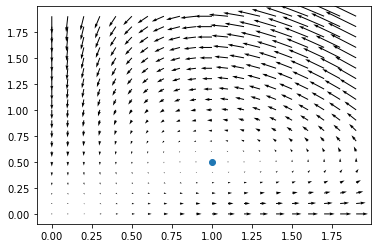

In [39]:
N1 = 2  #nombre de points selon x1
N2 = 2  #nombre de points selon x2
step = 0.1

x1 = np.arange(0, N1, step)
x2 = np.arange(0, N2, step)

nods = np.meshgrid(x1, x2)
x_point = f(nods)

#affichage
plt.figure()
plt.quiver(x1, x2, x_point[0], x_point[1])
plt.scatter(gamma/delta, alpha/beta)
plt.show()

En normalisant les vecteurs afin de faciliter la lecture graphique, on obtient le champ ci-dessous :

<ipython-input-40-bca1898026d2>:7: RuntimeWarning: invalid value encountered in true_divide
  plt.quiver(x1, x2, x_point[0]/N, x_point[1]/N)


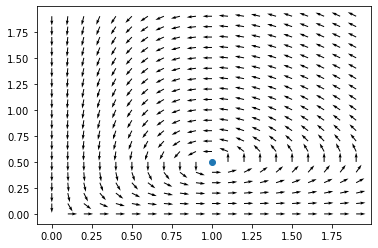

In [40]:
#normalisation
def norm(x1, x2):
    return (x1**2 + x2**2)**0.5
N = norm(x_point[0], x_point[1])
#affichage
plt.figure()
plt.quiver(x1, x2, x_point[0]/N, x_point[1]/N)
plt.scatter(gamma/delta, alpha/beta)
plt.show()

On visualise ci-dessous le portrait de phase, obtenu par la fonction *streamplot* :

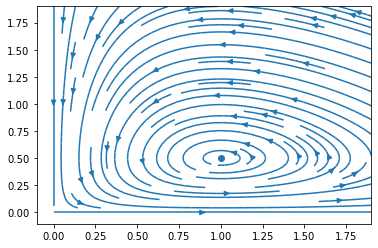

In [41]:
#affichage
plt.figure()
plt.streamplot(x1, x2, x_point[0], x_point[1])
plt.scatter(gamma/delta, alpha/beta)
plt.show()

A partir de ces représentations graphiques, on intuite le comportement des solutions : **on devine l'existence de cycles limites**.

### Question 3

Soit $x$ une solution maximale de $\dot{x} = f(x)$ (E) définie sur $I$, initialisée dans $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$ à l'instant $t_0\in\mathbb{R}$.

Supposons, par l'absurde, qu'elle ne reste pas dans $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$ sur $I$.

$f$ est continue donc $x$ aussi (et même $C^{1}$) sur $I$ en tant que solution de (E). Ainsi, d'après le théorème des valeurs intermédiaires :
$$\exists t_1\in\mathring{I}, \exists i\in\{1,2\}, \text{tel que } x_i(t_1) = 0, \text{donc } \dot{x_i}(t_1)=0,$$ cette dernière égalité étant due à l'expression de $f$ qui est telle que $f(x_i) = 0$ dès que $x_i = 0$.

**Traitons d'abord le cas $i = 1$.**

Soit $\tilde{x} = (\tilde{x_1},\tilde{x_2})$ définie sur $I$ tout entier par :
$$\left\{
    \begin{array}{ll}
        \tilde{x_1} = 0\\
        \dot{\tilde{x_2}}=-\gamma\tilde{x_2}\\
        \tilde{x_2}(t_1) = x_2(t_1)
    \end{array}
\right.,
$$
ce qui se résout facilement : $\tilde{x_2} : t \mapsto x_2(t_1)\cdot\exp{(-\gamma(t-t_1))}$

On vérifie alors :
$$\left\{
    \begin{array}{ll}
        \tilde{x_1}(\alpha-\beta\tilde{x_2})=0=\dot{\tilde{x_1}}\\
        -\tilde{x_2}(\gamma-\delta\tilde{x_1})=-\gamma\tilde{x_2}=\dot{\tilde{x_2}}
    \end{array}
\right.
$$
donc $\tilde{x}$ est solution de (E) sur $I$, tout comme $x$, et $\tilde{x}(t_1)=(0,x_2(t_1))=x(t_1)$. 

Comme $f$ est continue et continûment différentiable par rapport à $x$, on a : $$\tilde{x}=x\text{ sur I,}$$ par unicité de la solution maximale au problème de Cauchy $\left\{
    \begin{array}{ll}
        \dot{y} = f(y)\\
        y(t_1)=x(t_1)
    \end{array}
\right.$.

En particulier, $x(t_0)=\tilde{x}(t_0)$, donc $x_1(t_0)=\tilde{x_1}(t_0)=0$, ce qui contredit $x$ initialisé dans $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$.

D'où la contradiction.

**Traitons à présent le cas $i = 2$, qui se traite exactement de la même manière.**

Soit $\tilde{x} = (\tilde{x_1},\tilde{x_2})$ définie sur $I$ tout entier par :
$$\left\{
    \begin{array}{ll}
        \tilde{x_2} = 0\\
        \dot{\tilde{x_1}}=\alpha\tilde{x_1}\\
        \tilde{x_1}(t_1) = x_1(t_1)
    \end{array}
\right.,
$$
ce qui se résout facilement : $\tilde{x_1} : t \mapsto x_1(t_1)\cdot\exp{(-\gamma(t-t_1))}$

On vérifie alors :
$$\left\{
    \begin{array}{ll}
        -\tilde{x_2}(\gamma-\delta\tilde{x_1})=0=\dot{\tilde{x_2}}\\
        \tilde{x_1}(\alpha-\beta\tilde{x_2})=\alpha\tilde{x_1}=\dot{\tilde{x_1}}
    \end{array}
\right.
$$
donc $\tilde{x}$ est solution de (E) sur $I$, tout comme $x$, et $\tilde{x}(t_1)=(x_1(t_1),0)=x(t_1)$. 

Comme $f$ est continue et continûment différentiable par rapport à $x$, on a : $$\tilde{x}=x\text{ sur I,}$$ par unicité de la solution maximale au problème de Cauchy $\left\{
    \begin{array}{ll}
        \dot{y} = f(y)\\
        y(t_1)=x(t_1)
    \end{array}
\right.$.

En particulier, $x(t_0)=\tilde{x}(t_0)$, donc $x_2(t_0)=\tilde{x_2}(t_0)=0$, ce qui contredit $x$ initialisé dans $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$.

D'où la contradiction.

**Finalement, des deux cas, on déduit : $x$ reste dans $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$.**

### Question 4

Soit $x=(x_1,x_2)$ solution de $\dot{x}=f(x)$ initialisée dans $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$, définie sur $I$. Alors d'après Q3, $x_1$ et $x_2$ sont à valeurs dans $\mathbb{R}_{+}^{*}$, ce qui justifie la bonne définition de $H$.

$x$ est $C^{1}$ sur $I$, $\ln$ est $C^{1}$, donc par composition et somme de fonctions $C^{1}$, $t\mapsto H(x_1(t),x_2(t))$ est $C^{1}$ sur $I$ et $\forall t \in I$ :
$$\dot{H}(t) := \frac{d(H\circ x(t))}{dt} = \delta\dot{x_1}(t)-\gamma\frac{\dot{x_1}(t)}{x_1(t)}+\beta\dot{x_2}(t)-\alpha\frac{\dot{x_2}(t)}{x_2(t)}$$
D'où, en injectant l'expression de l'équation différentielle :
$$\dot{H}(t) = \delta x_1(\alpha-\beta x_2)-\gamma(\alpha-\beta x_2)-\beta x_2(\gamma-\delta x_1)+\alpha(\gamma-\delta x_1)=0$$

Soit $x$ un solution maximale initialisée en $x_0\in\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$ et définie sur $I=]-\underline{t},\bar{t}[$ (la forme de $I$ est donnée par le théorème de Peano-Arzela car $f$ est continue).

Comme $f$ est continue, on peut appliquer le théorème du domaine maximal d'existence : si $\bar{t}$ est fini, alors soit $\lim_{t\to \bar{t}} \Vert x(t) \Vert = +\infty$ (1), soit $\lim_{t\to \bar{t}} d((t,x(t)),\partial(\mathbb{R}\times\mathbb{R}^{2})) = 0$ (2).

Or, (1) $\Rightarrow x_1$ ou $x_2$ non bornée, traitons par exemple le cas où $x_1$ est non bornée. $x_1 >0$ donc on peut trouver $(t_k)_{k \in \mathbb{N}}$ une suite telle que $\lim_{k\to +\infty} t_k = \bar{t}$ et $\lim_{k\to +\infty} x_1 (t_k) = +\infty$. 

Donc, par croissance comparée (entre une fonction linéaire et logarithmique) et car $\alpha,\beta>0$, 
$\lim_{k\to +\infty} \alpha x_1 (t_k) - \beta ln(x_1 (t_k)) = +\infty$

De plus si $(x_2 (t_k))_{k \in \mathbb{N}}$ est minorée par une constante strictement positive, par somme, 
$\lim_{k\to +\infty} H(x(t_k)) = +\infty$

sinon on peut extraire de $(t_k)_{k \in \mathbb{N}}$ une sous-suite $(t'_k)_{k \in \mathbb{N}}$ telle que 
$\lim_{k\to +\infty} x_2 (t'_k) = 0$

On a alors $\lim_{k\to +\infty} \gamma x_2 (t'_k) - \delta ln(x_2 (t'_k)) = +\infty$ (car $\delta >0$), et par extraction on à toujours $\lim_{k\to +\infty} \alpha x_1 (t'_k) - \beta ln(x_1 (t'_k)) = +\infty$, donc par somme
$\lim_{k\to +\infty} H(x(t'_k)) = +\infty$

Dans tous les cas on peut trouver $(t_k)_{k \in \mathbb{N}}$ une suite telle que $\lim_{k\to +\infty} t_k = \bar{t}$ et $\lim_{k\to +\infty} H(x(t_k)) = +\infty$.  $\lim_{t\to \bar{t}} H(t) = +\infty$, ce qui contredit $\dot{H}=0$.
Donc (1) est impossible.

Mais (2) est également impossible, car impliquerait $t \rightarrow +\infty$, ce qui est absurde car $\bar{t}$ est supposé fini.

Donc, (1) et (2) entrant en défaut, $\bar{t}$ est infini et, de même, on obtient $\underline{t}$ infini.

**Donc, une telle solution est défini sur $\mathbb{R}$ tout entier.**

### Question 5

Représentons à présent les courbes de niveaux de H :

In [7]:
#définition de H
def H(x1, x2):
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

In [8]:
#fonction de tracé des courbes de niveaux
def display_contour(f, x, y, levels):
    """fonction donnée dans le premier projet numérique"""
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

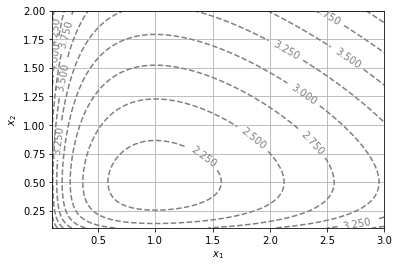

In [42]:
#affichage
display_contour(
    H, 
    x=np.linspace(0.1, 3.0, 100), 
    y=np.linspace(0.1, 2.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.show()

$\bar{x}$ se trouve à l'intérieur des surfaces délimitées par les courbes de niveau, et est encerclé par les courbes au fur et à mesure que la surface qu'elles délimitent rétrécit.

On déduit le comportement suivant des solutions : comme $H$ doit rester constant (Q4), les solutions parcourent les courbes de niveaux et, de plus, le parcours se fait toujours dans le même sens. En effet, si tel n'était pas le cas, alors on aurait à un instant donné $\dot{x_1}=\dot{x_2}=0$ (au moment où le sens de parcours change, du fait de la géométrie des courbes de niveau). On a alors $x_1=x_2$ pour tous les instants ultérieurs, ce qui contredit Q3.

**Le mouvement est donc bien oscillant**.

La représentation des courbes de niveaux de $H$ permet de voir que plus les courbes sont reserées, plus leur niveau est faible. Autrement dit, $\bar{x}$ est dans un puits de potentiel. **Il est donc clair que $\bar{x}$ est stable.**

Pour montrer rigoureusement la stabilité de $\bar{x}$, introduisons la fonction $V := x \mapsto H(x) - H(\bar{x})$. Montrons qu'il s'agit d'un potentiel de Lyapunov.

$V$ est continûment différentiable sur $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$ car $H$ l'est.

$V(\bar{x})=0$

Soit $(\overrightarrow{e_1},\overrightarrow{e_2})$ la base canonique de $\mathbb{R}^{2}$. Soit $x\in\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*} - \{\bar{x}\}$ tel que $x = x_1\overrightarrow{e_1}+x_2\overrightarrow{e_2}$. Soit $\overrightarrow{u}=x-\bar{x}$ et $\lambda$ et $\mu$ tels que = $\overrightarrow{u}=\lambda\overrightarrow{e_1}+\mu\overrightarrow{e_2}$.

$[\bar{x},x]\subset\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$ et $V$ est continûment différentiable sur $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$. Le théorème fondamental du calcul est alors applicable et on a :
$$V(x)-V(\bar{x})=\int_0^{1} dV(\bar{x}+t\overrightarrow{u})\cdot\overrightarrow{u}dt$$
D'où, comme $V(\bar{x})=0$, et comme $J_V(\bar{x}+t\overrightarrow{u}) = (\delta-\gamma\frac{1}{(\bar{x}+t\overrightarrow{u})_1}, \beta-\alpha\frac{1}{(\bar{x}+t\overrightarrow{u})_2})$ en notation matricielle :
$$V(x)=\int_0^{1} \delta\lambda(1-\frac{1}{1+\frac{\delta}{\gamma}\epsilon_1(t)})+\beta\mu(1-\frac{1}{1+\frac{\beta}{\alpha}\epsilon_2(t)})dt,$$
où $\epsilon_1(t)$ et $\epsilon_2(t)$ sont tels que $\bar{x}+t\overrightarrow{u}=\bar{x}+(\epsilon_1(t),\epsilon_2(t))$.

On a en fait $(\epsilon_1(t),\epsilon_2(t))=(\lambda t,\mu t)$. D'où :
$$V(x)=\int_0^{1} \delta\lambda(1-\frac{1}{1+\frac{\delta}{\gamma}\lambda t})+\beta\mu(1-\frac{1}{1+\frac{\beta}{\alpha}\mu t})dt$$
Or, $1-\frac{1}{1+\frac{\delta}{\gamma}\lambda t}\geq0$ si et seulement si $\lambda\geq0$. Donc $\delta\lambda(1-\frac{1}{1+\frac{\delta}{\gamma}\lambda t})\geq0$. Idem pour le second élément de la somme sous l'intégrale.

Donc finalement, $V(x)\geq0$ avec égalité si et seulement si $\overrightarrow{u}=\overrightarrow{0} \Leftrightarrow x=\bar{x}$.

**$V$ est donc bien un potentiel de Lyapunov.**

Le gradient de $V$ en $x$ vaut :
$$\nabla V(x)=(\delta-\gamma\frac{1}{x_1})\overrightarrow{e_1}+(\beta-\alpha\frac{1}{x_2})\overrightarrow{e_2}$$

On en déduit alors :
$$\langle\nabla V(x),f(x)\rangle=(\delta-\frac{\gamma}{x_1})x_1(\alpha-\beta x_2)+(\beta-\frac{\alpha}{x_2})x_2(\delta x_1-\gamma)=(\delta x_1-\gamma)(\alpha-\beta x_2)+(\beta x_2-\alpha)(\delta x_1-\gamma)$$
Après simplification, il vient :
$$\langle\nabla V(x),f(x)\rangle=0$$

Ainsi, $\langle\nabla V(x),f(x)\rangle\leq0$, donc $\bar{x}$ est un point d'équilibre stable.

### Question 6

**Code de l'algorithme d'Euler explicite**

Implémentons à présent une fonction appliquant la méthode d'Euler explicite à la résolution d'une équation différentielle.

In [10]:
def solve_euler_explicit(f, x0, dt, t0, tf):

    #initialisation
    nb_points = int((tf - t0)/dt)
    T = np.linspace(t0, nb_points*dt, nb_points)
    X = []
    X = np.array(nb_points*[x0])
    X[0] = x0

    #application du schéma d'Euler
    for i in range(len(T)-1):
        X[i+1] = X[i] + dt*f(T[i], X[i])
    
    return T, X

**Test de la fonction**

On teste cette fonction sur des équations différentielles aux solutions connues. Dans la suite, on trace en rouge la solution obtenue par *solve_euler_explicit* et en vert la solution analytique.

In [11]:
#fonctions de test
def f1(t, x) : return np.exp(t)
def f2(t, x) : return -x
def f3(t, x) : return -x + np.sin(t)

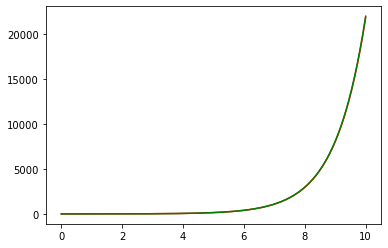

In [43]:
#test pour f1
plt.figure()
T, X = solve_euler_explicit(f1, 1., 1e-2, 0, 10)
plt.plot(T, X, 'red')
plt.plot(T, np.exp(T), 'green')
plt.show()

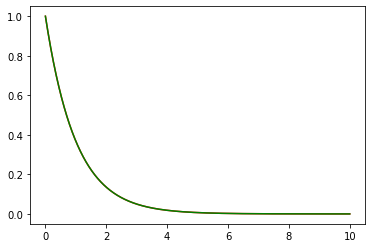

In [44]:
#test pour f2
plt.figure()
T, X = solve_euler_explicit(f2, 1., 1e-3, 0, 10)
plt.plot(T, X, 'red')
plt.plot(T, np.exp(-T), 'green')
plt.show()

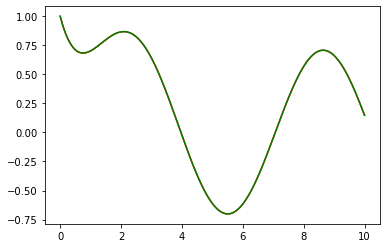

In [45]:
#test pour f3
plt.figure()
T, X = solve_euler_explicit(f3, 1., 1e-3, 0, 10)
plt.plot(T, X, 'red')
plt.plot(T, (3*np.exp(-T) + np.sin(T) - np.cos(T))/2, 'green')
plt.show()

Pour les trois exemples testés, les deux courbes sont indiscernables. L'implémentation proposée du schéma d'Euler explicite est donc satisfaisante.

**Preuve de la convergence du schéma d'Euler explicite**

Afin de prouver la convergence du schéma, il s'agit de prouver :
- sa consistance
- sa stabilité

Pour les méthodes numériques de résolution des équations différentielles, notons $\Phi$ la fonction telle que $x^{j+1}=x^{j}+\Delta t_j \Phi(t_j, x^{j}, \Delta t_j)$.

Pour le schéma d'Euler explicite, $\Phi(t_j, x^{j}, \Delta t_j) = f(t_j, x^{j})$. Ainsi, $\Phi$ est continue et, de plus, $\Phi(t,x,\Delta t)=f(t,x)$ indépendamment de $\Delta t$. Donc pour tout $t$, pour tout $x$, $\Phi(t,x,0)=f(t,x)$. La condition nécessaire et suffisante de consistance est vérifiée et **le schéma est consistant.**

$f$ est $C^{1}$ par rapport à $x$, donc $x \mapsto \Phi(t,x)=f(t,x,\Delta t)$ est $C^{1}$. Comme le schéma est consistant, d'après la condition suffisante de convergence, **le schéma est convergent**.

**Visualisation graphique de l'ordre de convergence**

Pour visualiser l'ordre de convergence graphiquement, on se propose de tracer $\log(erreur\_max(dt))$ en fonction de $\log(dt)$ où $erreur\_max(dt)$ est l'erreur la plus grande commise sur l'ensemble des points en utilisant un schéma d'Euler implicite avec un pas de temps $dt$.

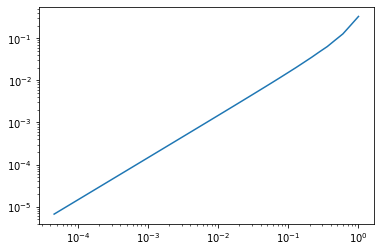

In [15]:
def erreur_max(X_num, X_exact):
    return np.max(abs(X_num - X_exact))

N = 40

tab_dt = np.exp(np.linspace(-10, 0, N))
liste_erreur_max = []

for dt in tab_dt:
    T, X = solve_euler_explicit(f2, 1., dt, 0, 10)
    erreur = erreur_max(X, np.exp(-T))
    liste_erreur_max.append(erreur)

plt.figure()

plt.loglog(tab_dt, np.array(liste_erreur_max))
plt.show()

On obtient une droite :
$$\log(erreur\_max) = p\cdot\log(dt)+C,$$
avec ici $p\approx 1$.

**D'où un schéma d'ordre de convergence 1.**

*Remarque :* On a choisi de tracer $erreur\_max(dt)$ en échelle logarithmique afin de pouvoir déterminer facilement l'ordre, y compris si celui-ci avait été supérieur strictement à 1. Ici, l'ordre étant de 1, on aurait toutefois pu le déterminer sans utiliser une telle échelle. 

### Question 7

Appliquons ce schéma aux équations de Lotka-Volterra.

In [16]:
def destationnarise(f):
    def aux(t, x):
        return f(x)
    return aux

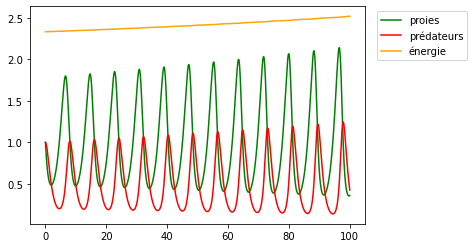

In [46]:
#affichage temporel des solutions
T, X = solve_euler_explicit(destationnarise(f), np.array([1., 1.]), 1e-2, 0, 100)
p1, = plt.plot(T, X[:, 0], 'green', label="proies")
p2, = plt.plot(T, X[:, 1], 'red', label="prédateurs")
p3, = plt.plot(T, H(X[:, 0], X[:, 1]), 'orange', label="énergie")
plt.legend(handles = [p1, p2, p3], loc = 'upper center', bbox_to_anchor = (1.17, 1))
plt.show()

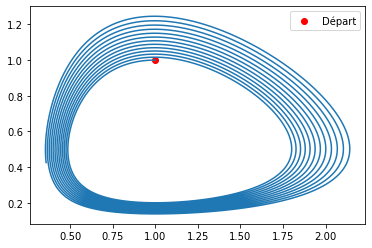

In [47]:
#affichage dans le plan des solutions : proies en abscisse, prédateurs en ordonnées
plt.plot(X[:, 0], X[:, 1])
plt.scatter(*X[0, :], color = 'red', label = "Départ")
plt.legend()
plt.show()

Les solutions observées sont oscillantes, comme attendu.

Toutefois, en temps long, les deux populations divergent et l'énergie H n'est pas conservée (elle croît).

**Cette résolution n'est donc pas fidèle à la réalité.**

### Question 8

**Code de l'algorithme d'Euler implicite**

On propose ici deux fonctions *solve_euler_implicit* :
- une première qui utilise, afin de résoudre l'équation implicite, la fonction *fsolve* de la bibliothèque *scipy*, et qui offre ainsi un gain d'efficacité
- une seconde qui n'utilise aucune fonction extérieure et recode ainsi une fonction de résolution de point fixe.

In [19]:
def solve_euler_implicit_fsolve(f, x0, dt, t0, tf, itermax = 100):

    #initialisation
    nb_points = int((tf - t0)/dt)
    T = np.linspace(t0, nb_points*dt, nb_points)
    X = []
    X = np.array(nb_points*[x0])
    X[0] = x0

    #application du schéma d'Euler
    for i in range(1, len(T)):
        X[i] = sc.optimize.fsolve(lambda s : s - X[i-1] - dt * f(T[i], s), X[i-1], maxfev = itermax)
    return T, X

In [20]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax=10000, eps=0.01):

    #initialisation
    nb_points = int((tf - t0)/dt)
    T = np.linspace(t0, nb_points*dt, nb_points)
    X = np.array(nb_points*[x0])
    X[0] = x0

    for j in range(len(T)-1):

        def F_j(x):
            return X[j] + dt*f(T[j+1], x)

        k = 0
        x_j0 = F_j(X[j])
        x_jk = x_j0

        while k < itermax and np.linalg.norm(F_j(x_jk) - x_jk) > eps*np.linalg.norm(x_j0):
            x_jk = F_j(x_jk)
            k += 1

        X[j+1] = X[j] + dt*f(T[j], x_jk)
    
    return T, X

On utilise dans la suite la version sans *scipy*.

**Test de la fonction**

On teste cette fonction sur des équations différentielles aux solutions connues. Dans la suite, on trace en rouge la solution obtenue par *solve_euler_implicit* et en vert la solution analytique.

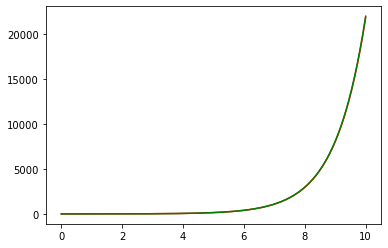

In [49]:
#test pour f1
plt.figure()
T, X = solve_euler_implicit(f1, 1., 1e-2, 0, 10)
plt.plot(T, X, 'red')
plt.plot(T, np.exp(T), 'green')
plt.show()

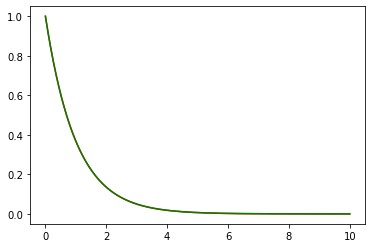

In [50]:
#test pour f2
plt.figure()
T, X = solve_euler_implicit_fsolve(f2, 1., 1e-3, 0, 10)
plt.plot(T, X, 'red')
plt.plot(T, np.exp(-T), 'green')
plt.show()

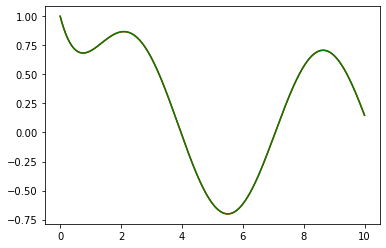

In [73]:
#test pour f3
plt.figure()
T, X = solve_euler_implicit(f3, 1., 1e-3, 0, 10)
plt.plot(T, X, 'red')
plt.plot(T, (3*np.exp(-T) + np.sin(T) - np.cos(T))/2, 'green')
plt.show()

Pour les trois exemples testés, les deux courbes sont indiscernables. L'implémentation proposée du schéma d'Euler implicite est donc satisfaisante.

On applique cette méthode de résolution aux équations de Lotka-Volterra :

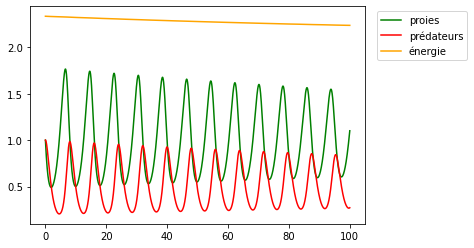

In [51]:
#affichage temporel des solutions
T, X = solve_euler_implicit(destationnarise(f), np.array([1., 1.]), 1e-2, 0, 100)
plt.plot(T, X[:, 0], 'green', label="proies")
plt.plot(T, X[:, 1], 'red', label="prédateurs")
plt.plot(T, H(X[:, 0], X[:, 1]), 'orange', label="énergie")
plt.legend(handles = [p1, p2, p3], loc = 'upper center', bbox_to_anchor = (1.17, 1))
plt.show()

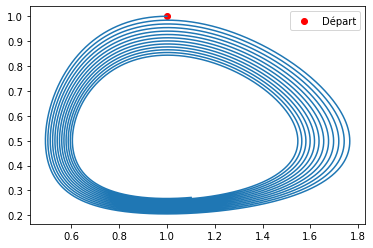

In [52]:
#affichage dans le plan des solutions : proies en abscisse, prédateurs en ordonnées
plt.plot(X[:, 0], X[:, 1])
plt.scatter(*X[0, :], color = 'red', label = "Départ")
plt.legend()
plt.show()

Cette fois, les solutions convergent vers $\bar{x}$ et l'énergie $H$ décroît. **Ce n'est donc pas non plus fidèle à la réalité.**

### Question 9

Soit $u : \mathbb{R}^{2} \rightarrow \mathbb{R}^{2}$ une application $C^1$.

Considérons le problème de Cauchy associé au nouveau système et avec la condition initiale $x(t_0) = x_0$.

On considère la solution $x^{*}$ du problème de Cauchy associé au système d'équations de Lotka-Volterra et avec la condition initiale $x(t_0) = x_0$. Cette solution existe par le théorème de Peano-Arzela.

On remarque que $x^{*}$ est aussi solution du nouveau système car pour tout $t$, $H(x^{*}(t)) = H_0$ ($H$ est constante d'après Q4).

Le théorème de Cauchy-Lipschitz sur le nouveau système (qui peut s'appliquer grâce au caractère $C^1$ de $u$) assure l'unicité de cette solution.

**Ainsi, pour tout $u$ $C^1$, les solutions du nouveau système sont identiques aux solutions du système de Lotka-Volterra.**

### Question 10

Soit $x$ une solution du nouveau système initialisée dans $\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$.

$\forall t \in \mathbb{R} :$
$$\frac{d}{dt}(H(x(t))-H_0) = \dot{x_1}\frac{dH}{dx_1}+\dot{x_2}\frac{dH}{dx_2}$$
D'où :
$$\frac{d}{dt}(H(x(t))-H_0) = (x_1(\alpha-\beta x_2)-u_1(x_1,x_2)(H(x_1,x_2)-H_0))(\delta-\frac{\gamma}{x_1})+(-x_2(\gamma-\delta x_1)-u_2(x_1,x_2)(H(x_1,x_2)-H_0))(\beta-\frac{\alpha}{x_2})$$
D'où :
$$\frac{d}{dt}(H(x(t))-H_0) = -(H(x_1,x_2)-H_0)[u_1(x_1,x_2)(\delta-\frac{\gamma}{x_1})+u_2(x_1,x_2)(\beta-\frac{\alpha}{x_2})]$$
Or :$$\Vert\nabla H(x(t))\Vert^{2}=(\delta-\frac{\gamma}{x_1})^{2}+(\beta-\frac{\alpha}{x_2})^{2}$$

Donc pour $u:(x_1,x_2)\in \mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}\mapsto(k(\delta-\frac{\gamma}{x_1}),k(\beta-\frac{\alpha}{x_2}))$, où $k>0$ est fixé.

On a $\forall t\in\mathbb{R}$ :
$$\frac{d}{dt}(H(x(t))-H_0) = -k\Vert\nabla H(x(t))\Vert^{2}(H(x(t))-H_0)\text{  }(*)$$

De plus, on sait que $\forall t\in\mathbb{R}$ :
$$\Vert\nabla H(x(t))\Vert^{2}\geq c,$$
où $c$ est une constante telle que $c>0$.

En multipliant $(*)$ par $(H(x(t))-H_0)$, on obtient :
$$\frac{1}{2} \frac{d}{dt}((H(x(t))-H_0)^{2})=-k(H(x(t))-H_0)^{2}\Vert\nabla H(x(t))\Vert^{2}$$
Donc :
$$\frac{d}{dt}((H(x(t))-H_0)^{2})\leq-2ck(H(x(t))-H_0)^{2}$$
Donc, par le lemme de Grönwall :
$$\forall t\in\mathbb{R} : (H(x(t))-H_0)^{2}\leq(H(x(0))-H_0)^{2}\exp(-2ckt)$$
Donc :
$$|H(x(t))-H_0|\leq|H(x(0))-H_0|\exp(-ckt)$$
**Et donc $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t\rightarrow +\infty$.**

### Question 11

On résout alors le nouveau système en utilisant un schéma d'Euler explicite puis implicite. On choisit pour $H_0$ : $H_0 = H(x(t_0))$.

In [60]:
def solve_new_system(x0, dt, t0, tf, k, method):
    H0 = H(x0[0],x0[1])
    def new_system(x):
        """x un tableau de taille 2"""
        x1, x2 = x[0], x[1]
        return np.array([x1 * (alpha - beta*x2) - k*(delta-gamma/x1)*(H(x1, x2) - H0), 
                         -x2 * (gamma - delta*x1) - k*(beta - alpha/x2)*(H(x1, x2) - H0)])
    return method(destationnarise(new_system), x0, dt, t0, tf)

**Avec un schéma d'Euler explicite :**

On tente de résoudre le nouveau système avec différentes valeurs de $k$.

**Pour $k=30$ :**

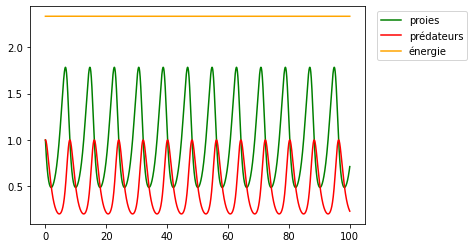

In [61]:
#affichage temporel des solutions
T, X = solve_new_system(np.array([1., 1.]), 1e-2, 0, 100, 30, solve_euler_explicit)
plt.plot(T, X[:, 0], 'green', label="proies")
plt.plot(T, X[:, 1], 'red', label="prédateurs")
plt.plot(T, H(X[:, 0], X[:, 1]), 'orange', label="énergie")
plt.legend(handles = [p1, p2, p3], loc = 'upper center', bbox_to_anchor = (1.17, 1))
plt.show()

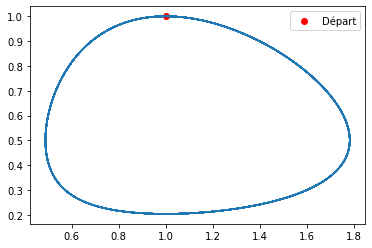

In [62]:
#affichage dans le plan des solutions : proies en abscisse, prédateurs en ordonnées
plt.plot(X[:, 0], X[:, 1])
plt.scatter(*X[0, :], color = 'red', label = "Départ")
plt.legend()
plt.show()

La résolution est concluante pour $k=30$ avec Euler explicite. On note que, cette fois, $H$ se conserve. On obtient une solution compatible avec la réalité.

**Pour $k=80$ :**

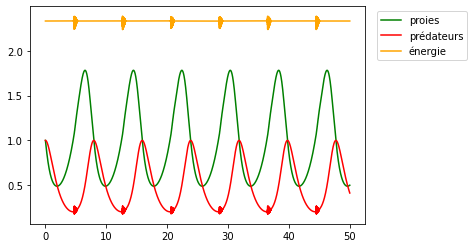

In [79]:
#affichage temporel des solutions
T, X = solve_new_system(np.array([1., 1.]), 1e-2, 0, 50, 70, solve_euler_explicit)
plt.plot(T, X[:, 0], 'green', label="proies")
plt.plot(T, X[:, 1], 'red', label="prédateurs")
plt.plot(T, H(X[:, 0], X[:, 1]), 'orange', label="énergie")
plt.legend(handles = [p1, p2, p3], loc = 'upper center', bbox_to_anchor = (1.17, 1))
plt.show()

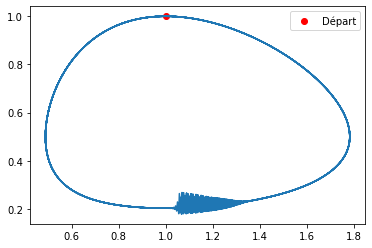

In [80]:
#affichage dans le plan des solutions : proies en abscisse, prédateurs en ordonnées
plt.plot(X[:, 0], X[:, 1])
plt.scatter(*X[0, :], color = 'red', label = "Départ")
plt.legend()
plt.show()

Cette fois, pour $k=70$, les solutions présentent des anomalies : la fonction échoue à résoudre correctement le système.

**Avec un schéma d'Euler implicite :**

De même que pour Euler explicite, on tente ici de résoudre le nouveau système avec différentes valeurs de $k$.

**Pour $k=20$ :**

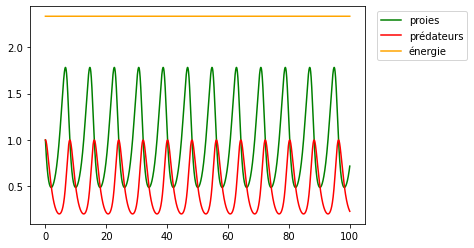

In [65]:
#affichage temporel des solutions
T, X = solve_new_system(np.array([1., 1.]), 1e-2, 0, 100, 20, solve_euler_implicit)
plt.plot(T, X[:, 0], 'green', label="proies")
plt.plot(T, X[:, 1], 'red', label="prédateurs")
plt.plot(T, H(X[:, 0], X[:, 1]), 'orange', label="énergie")
plt.legend(handles = [p1, p2, p3], loc = 'upper center', bbox_to_anchor = (1.17, 1))
plt.show()

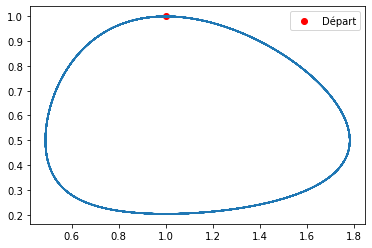

In [66]:
#affichage dans le plan des solutions : proies en abscisse, prédateurs en ordonnées
plt.plot(X[:, 0], X[:, 1])
plt.scatter(*X[0, :], color = 'red', label = "Départ")
plt.legend()
plt.show()

La résolution est concluante pour $k=20$ avec Euler implicite. On note que, cette fois, $H$ se conserve. On obtient une solution compatible avec la réalité.

**Pour $k=30$ :**

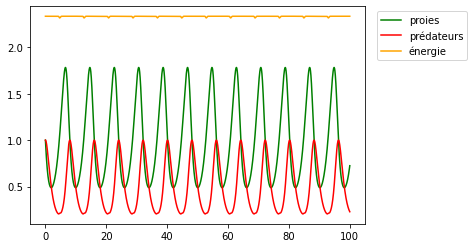

In [67]:
#affichage temporel des solutions
T, X = solve_new_system(np.array([1., 1.]), 1e-2, 0, 100, 30, solve_euler_implicit)
plt.plot(T, X[:, 0], 'green', label="proies")
plt.plot(T, X[:, 1], 'red', label="prédateurs")
plt.plot(T, H(X[:, 0], X[:, 1]), 'orange', label="énergie")
plt.legend(handles = [p1, p2, p3], loc = 'upper center', bbox_to_anchor = (1.17, 1))
plt.show()

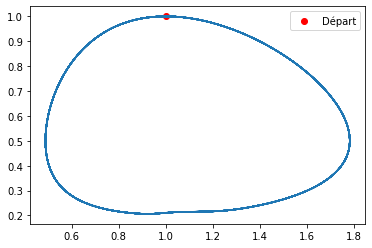

In [68]:
#affichage dans le plan des solutions : proies en abscisse, prédateurs en ordonnées
plt.plot(X[:, 0], X[:, 1])
plt.scatter(*X[0, :], color = 'red', label = "Départ")
plt.legend()
plt.show()

Dès $k=30$, les solutions présentent des anomalies (autour de (1., 0.25). Cela est particulièrement visible sur le tracé de $H$, qui n'est pas parfaitement conservé. Et pour des valeurs de k encore plus grandes le schéma implicite ne permet même plus de simuler le comportement sur plusieurs cycles.

Avec les exemples ci-dessus, il semble clair, à la fois pour le schéma explicite et pour le schéma implicite, que $k$ ne peut être choisi arbitrairement grand.

Afin de comprendre pourquoi et quel est le rôle de $k$, exprimons $H(x^{j+1})-H(x_0)$ en fonction de $H(x^{j})-H(x_0)$ :
$$H(x^{j+1})-H(x_0) = H(x^j+dt f(x^j))-H(x_0) = H(x^j+dt f(x^j))-H(x^j)+H(x^j)-H(x_0)$$
D'où, par un développement de Taylor au premier ordre :
$$H(x^{j+1})-H(x_0)\approx J_{H}(x^{j})(dt f(x^j))+H(x^j)-H(x_0)$$
Or, $\forall x=(x_1,x_2)\in\mathbb{R}_{+}^{*}\times\mathbb{R}_{+}^{*}$ : $J_{H}(x) = (\delta - \frac{\gamma}{x_{1}}, \beta - \frac{\alpha}{x_{2}})$. D'où :
$$H(x^{j+1})-H(x_0)\approx(\delta - \frac{\gamma}{x_{1}^{j}}, \beta - \frac{\alpha}{x_{2}^{j}})\begin{pmatrix} x_{1}^{j}(\alpha-\beta x_{2}^{j}) -k (\delta-\frac{\gamma}{x_{1}^{j}})(H(x^{j})-H_0)\\ -x_{2}^{j}(\gamma-\delta x_{1}^{j})-k(\beta-\frac{\alpha}{x_{2}^{j}})(H(x^{j})-H_0) \end{pmatrix}dt+H(x^{j})-H_0$$
D'où, après simplifications :
$$H(x^{j+1})-H(x_0)\approx(\delta - \frac{\gamma}{x_{1}^{j}}, \beta - \frac{\alpha}{x_{2}^{j}})\begin{pmatrix} -k (\delta-\frac{\gamma}{x_{1}^{j}})(H(x^{j})-H_0)\\ -k(\beta-\frac{\alpha}{x_{2}^{j}})(H(x^{j})-H_0) \end{pmatrix}dt+H(x^{j})-H_0$$
Soit :
$$H(x^{j+1})-H(x_0)\approx (-k(\delta - \frac{\gamma}{x_{1}^{j}}, \beta - \frac{\alpha}{x_{2}^{j}})\begin{pmatrix} (\delta-\frac{\gamma}{x_{1}^{j}})\\ (\beta-\frac{\alpha}{x_{2}^{j}}) \end{pmatrix}dt+1)(H(x^{j})-H_0)$$
Ce qui se réécrit encore :
$$H(x^{j+1})-H(x_0)\approx (1-k\Vert\nabla H_{|x_j}\Vert^{2}dt)(H(x^{j})-H_0)$$

Ainsi donc, comme $H$ est conservé, on doit avoir $k\Vert\nabla H_{|x_j}\Vert^{2}dt\ll 1$. **$k$ ne peut donc pas être choisi arbitrairement grand.**

Le calcul précédent permet de comprendre pourquoi, dans le cas du schéma implicite, on obtient des anomalies pour des valeurs de $k$ trop élevées. De plus on peut vérifier la compatibilité de la condition trouvée avec les exemples réalisés plus haut. En effet on a pris $\alpha$, $\beta$, $\gamma$, $\delta$, $x_1$ et $x_2$ de l'ordre de l'unité. Le calcul précédent montre qu'on a alors $\Vert\nabla H\Vert^{2}$ de l'ordre de l'unité. On s'attend donc à obtenir des anomalies importantes à partir de $k \cdot dt \approx 1$. Cela est vérifié en ordre de grandeur puisque l'on observe des anomalies significatives à partir de $k = 70$ soit $k \cdot dt = 0.7 \approx 1$ et que pour $k = 90$ on n'observe même plus de cycle.

Cependant, il nous faut encore comprendre pourquoi le schéma implicite est beaucoup plus sensible à l'augmentation de la valeur de $k$ (non convergence dès $k = 40$). Cela s'explique par la condition imposée par la recherche de point fixe. L'application 
$F_j : x \mapsto X[j] + dt \cdot (f(x) - k\Vert\nabla H_{|x_j}\Vert^{2}(H(x^{j})-H_0))$ doit être contractante pour assurer la terminaison de la recherche de point fixe, ce qui impose une nouvelle condition sur $k$, en plus de la précédente. Cela explique que le schéma implicite soit plus sensible à la valeur de $k$ et ne parvienne pas à terminer au lieu de simplement présenter des anomalies.

Ainsi $k$ peut être vu comme la raideur d'un système de rappel (ressort) tendant à ramener le système vers une position d'énergie $H_0$, i.e. creusant le potentiel le long de la courbe de niveau d'énergie $H_0$ afin de stabiliser le schéma autour de cette "énergie d'équilibre" et de la rendre plus robuste à  de petites perturbations, susceptibles d'apparaître lors de la simulation. Cependant, ce mécanisme de rappel ne doit pas être trop fort sans quoi le système peut surréagir et laisser apparaître, comme on l'a vu, des anomalies. En  d'autre termes pour bien jouer son rôle, le phénomène de rappel doit être négligeable devant ceux à l'oeuvre dans la dynamique naturelle du système, afin de garantir la stabilité sans pour autant prendre le dessus sur les phénomènes responsables des oscillations.